# Airline Data Challenge


#### by Xinyuan Jiang


### Problem Statement
You are working for an airline company looking to enter the United States domestic market. Specifically, the company has decided to start with 5 round trip routes between medium and large US airports. 

#### You have been tasked with analyzing 1Q2019 data to identify:
1. The 10 busiest round trip routes in terms of number of round trip flights in the quarter. Exclude canceled flights when performing the calculation.
2. The 10 most profitable round trip routes (without considering the upfront airplane cost) in the quarter. Along with the profit, show total revenue, total cost, summary values of other key components and total round trip flights in the quarter for the top 10 most profitable routes. Exclude canceled flights from these calculations.
3. The 5 round trip routes that you recommend to invest in based on any factors that you choose.
4. The number of round trip flights it will take to breakeven on the upfront airplane cost for each of the 5 round trip routes that you recommend. Print key summary components for these routes.
5. Key Performance Indicators (KPI’s) that you recommend tracking in the future to measure the success of the round trip routes that you recommend.

#### Here are basic information on the three datasets that you will analyze:
1. Flights dataset: Contains data about available routes from origin to destination. For occupancy, use the data provided in this dataset.
2. Tickets dataset: Ticket prices data (sample data only as the data is huge). Consider only round trips in your analysis.
3. Airport Codes dataset: Identifies whether an airport is considered medium or large sized. Consider only medium and large airports in your analysis.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Show all columns in pd.head()
pd.set_option('display.max_columns', None)

## Data Import and Data Quality Check
In this section I am importing all necessary data files, perform some EDA and data cleaning process. The aim is to prepare data for all underlying problems.

### Load datasets

In [2]:
# Load the path of these 3 data files
path = "/Users/simon/Desktop/Data_Challenge/data/"

# Load Flights dataset
flights = pd.read_csv(path + 'Flights.csv',low_memory=False)

# Load Tickets dataset
tickets = pd.read_csv(path + 'Tickets.csv')

# Load Airport Codes dataset
airport_codes = pd.read_csv(path + 'Airport_Codes.csv')

### Filter data
This study is focusing on data in a certain range, remove cancelled flights, keep round trips on tickes table, and keep medium and large airport on airport codes table. 

In [3]:
# Remove cancelled filghts from flights table
display(flights['CANCELLED'].unique())
flights = flights[flights['CANCELLED'] != 1.0]

# Keep round trip only on tickets table 
display(tickets['ROUNDTRIP'].unique())
tickets = tickets[tickets['ROUNDTRIP'] == 1.0]

# Keep medium and large airport only on airport codes table
display(airport_codes['TYPE'].unique())
airport_codes=airport_codes[airport_codes['TYPE'].isin(['medium_airport', 'large_airport'])][['IATA_CODE','TYPE']]

array([0., 1.])

array([1., 0.])

array(['heliport', 'small_airport', 'closed', 'seaplane_base',
       'balloonport', 'medium_airport', 'large_airport'], dtype=object)

### General information of data

In [4]:
# Get general information of each table
## General information of flights data
print('Flight data info')
flights.info()
display(flights.head())

## General information of tickets data
print('Ticket data info')
tickets.info()
display(tickets.head())

## General information of airport codes data
print('Airport code data info')
airport_codes.info()
display(airport_codes.head())

Flight data info
<class 'pandas.core.frame.DataFrame'>
Index: 1864272 entries, 0 to 1915885
Data columns (total 16 columns):
 #   Column             Dtype  
---  ------             -----  
 0   FL_DATE            object 
 1   OP_CARRIER         object 
 2   TAIL_NUM           object 
 3   OP_CARRIER_FL_NUM  object 
 4   ORIGIN_AIRPORT_ID  int64  
 5   ORIGIN             object 
 6   ORIGIN_CITY_NAME   object 
 7   DEST_AIRPORT_ID    int64  
 8   DESTINATION        object 
 9   DEST_CITY_NAME     object 
 10  DEP_DELAY          float64
 11  ARR_DELAY          float64
 12  CANCELLED          float64
 13  AIR_TIME           object 
 14  DISTANCE           object 
 15  OCCUPANCY_RATE     float64
dtypes: float64(4), int64(2), object(10)
memory usage: 241.8+ MB


,FL_DATE,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,DEST_AIRPORT_ID,DESTINATION,DEST_CITY_NAME,DEP_DELAY,ARR_DELAY,CANCELLED,AIR_TIME,DISTANCE,OCCUPANCY_RATE
0,2019-03-02,WN,N955WN,4591,14635,RSW,"Fort Myers, FL",11042,CLE,"Cleveland, OH",-8.0,-6.0,0.0,143.0,1025.0,0.97
1,2019-03-02,WN,N8686A,3231,14635,RSW,"Fort Myers, FL",11066,CMH,"Columbus, OH",1.0,5.0,0.0,135.0,930.0,0.55
2,2019-03-02,WN,N201LV,3383,14635,RSW,"Fort Myers, FL",11066,CMH,"Columbus, OH",0.0,4.0,0.0,132.0,930.0,0.91
3,2019-03-02,WN,N413WN,5498,14635,RSW,"Fort Myers, FL",11066,CMH,"Columbus, OH",11.0,14.0,0.0,136.0,930.0,0.67
4,2019-03-02,WN,N7832A,6933,14635,RSW,"Fort Myers, FL",11259,DAL,"Dallas, TX",0.0,-17.0,0.0,151.0,1005.0,0.62


Ticket data info
<class 'pandas.core.frame.DataFrame'>
Index: 708600 entries, 0 to 1167284
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ITIN_ID            708600 non-null  int64  
 1   YEAR               708600 non-null  int64  
 2   QUARTER            708600 non-null  int64  
 3   ORIGIN             708600 non-null  object 
 4   ORIGIN_COUNTRY     708600 non-null  object 
 5   ORIGIN_STATE_ABR   708600 non-null  object 
 6   ORIGIN_STATE_NM    708600 non-null  object 
 7   ROUNDTRIP          708600 non-null  float64
 8   REPORTING_CARRIER  708600 non-null  object 
 9   PASSENGERS         707403 non-null  float64
 10  ITIN_FARE          708040 non-null  object 
 11  DESTINATION        708600 non-null  object 
dtypes: float64(2), int64(3), object(7)
memory usage: 70.3+ MB


,ITIN_ID,YEAR,QUARTER,ORIGIN,ORIGIN_COUNTRY,ORIGIN_STATE_ABR,ORIGIN_STATE_NM,ROUNDTRIP,REPORTING_CARRIER,PASSENGERS,ITIN_FARE,DESTINATION
0,201912723049,2019,1,ABI,US,TX,Texas,1.0,MQ,1.0,736.0,DAB
1,201912723085,2019,1,ABI,US,TX,Texas,1.0,MQ,1.0,570.0,COS
2,201912723491,2019,1,ABI,US,TX,Texas,1.0,MQ,1.0,564.0,MCO
3,201912723428,2019,1,ABI,US,TX,Texas,1.0,MQ,1.0,345.0,LGA
10,201912723337,2019,1,ABI,US,TX,Texas,1.0,MQ,1.0,1647.0,JAX


Airport code data info
<class 'pandas.core.frame.DataFrame'>
Index: 5146 entries, 6194 to 55365
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   IATA_CODE  4459 non-null   object
 1   TYPE       5146 non-null   object
dtypes: object(2)
memory usage: 120.6+ KB


,IATA_CODE,TYPE
6194,WKK,medium_airport
10444,HIR,medium_airport
10449,MUA,medium_airport
10471,AHJ,medium_airport
10695,INU,medium_airport


In [5]:
# Get descriptive statistical results of each table
display(flights.describe())
display(tickets.describe())
display(airport_codes.describe())

,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,DEP_DELAY,ARR_DELAY,CANCELLED,OCCUPANCY_RATE
count,1.864272e+06,1.864272e+06,1.864272e+06,1.859895e+06,1864272.0,1.863962e+06
mean,1.268580e+04,1.268710e+04,1.076992e+01,5.648737e+00,0.0,6.502411e-01
std,1.522326e+03,1.521973e+03,5.006924e+01,5.241170e+01,0.0,2.020016e-01
min,1.013500e+04,1.013500e+04,-6.300000e+01,-9.400000e+01,0.0,3.000000e-01
25%,1.129200e+04,1.129200e+04,-6.000000e+00,-1.500000e+01,0.0,4.800000e-01
50%,1.288900e+04,1.288900e+04,-2.000000e+00,-6.000000e+00,0.0,6.500000e-01
75%,1.405700e+04,1.405700e+04,7.000000e+00,8.000000e+00,0.0,8.300000e-01
max,1.621800e+04,1.621800e+04,2.941000e+03,2.923000e+03,0.0,1.000000e+00


,ITIN_ID,YEAR,QUARTER,ROUNDTRIP,PASSENGERS
count,7.086000e+05,708600.0,708600.0,708600.0,707403.000000
mean,1.733027e+11,2019.0,1.0,1.0,1.936837
std,6.682374e+10,0.0,0.0,0.0,5.040905
min,2.019119e+06,2019.0,1.0,1.0,1.000000
25%,2.019116e+11,2019.0,1.0,1.0,1.000000
50%,2.019128e+11,2019.0,1.0,1.0,1.000000
75%,2.019140e+11,2019.0,1.0,1.0,1.000000
max,2.019153e+11,2019.0,1.0,1.0,681.000000


,IATA_CODE,TYPE
count,4459,5146
unique,4453,2
top,JNB,medium_airport
freq,3,4532


From these information, focusing on those columns related to the further steps, there are potential issues including wrong data types, missing values, logical errors, and errors on common key fields. The followings are checking and handeling data focusing on these topics.

### Check and modify data type
Noticing that 'DISTNACE', 'AIR_TIME' on flights table and 'ITIN_FARE' on ticket table are supposed to be numberical but be objective. After investigaing in details, below displayed the error data points in these 2 tables. Then replace these values to null and modify the data type to numbers.

In [6]:
# Check columns with wrong data type and useful for further analysis
flight_col = ['DISTANCE','AIR_TIME']
ticket_col = ['ITIN_FARE']

# Loop through all selected columns in flights, display data errors and replace by null 
for col in flight_col:
    display(flights.loc[~pd.to_numeric(flights[col], errors='coerce').notnull(), col].unique())
    flights[col] = pd.to_numeric(flights[col], errors='coerce')
    
# Loop through all selected columns in tickets, display data errors and replace by null 
for col in ticket_col:
    display(tickets.loc[~pd.to_numeric(tickets[col], errors='coerce').notnull(), col].unique())
    tickets[col] = pd.to_numeric(tickets[col], errors='coerce')

array(['Hundred', nan, 'Twenty', 'NAN', '****'], dtype=object)

array([nan, 'Two', 'NAN', '$$$'], dtype=object)

array(['820$$$', '200 $', '$ 100.00', nan], dtype=object)

### Check and replace missing values with means
Columns especially those necessary columns should not contain missing values or it could cause skewed results from further study. Belows are detials of all missing values, some are from the previous step some are originally blanks, and showing by the portion of the whole dataset.

In [7]:
# Identify and count missing values in each column
t1 = flights.isnull().mean()
t2 = tickets.isnull().mean()
t3 = airport_codes.isnull().mean()

# Title of each table
title1 = "Flights missing value portion"
title2 = "Tickets missing value portion"
title3 = "Airport Codes missing value portion"

# Display tables with titles
print(f"{title1}\n{t1}\n")
print(f"{title2}\n{t2}\n")
print(f"{title3}\n{t3}\n")


Flights missing value portion
FL_DATE              0.000000
OP_CARRIER           0.000000
TAIL_NUM             0.000000
OP_CARRIER_FL_NUM    0.000000
ORIGIN_AIRPORT_ID    0.000000
ORIGIN               0.000000
ORIGIN_CITY_NAME     0.000000
DEST_AIRPORT_ID      0.000000
DESTINATION          0.000000
DEST_CITY_NAME       0.000000
DEP_DELAY            0.000000
ARR_DELAY            0.002348
CANCELLED            0.000000
AIR_TIME             0.003678
DISTANCE             0.001438
OCCUPANCY_RATE       0.000166
dtype: float64

Tickets missing value portion
ITIN_ID              0.000000
YEAR                 0.000000
QUARTER              0.000000
ORIGIN               0.000000
ORIGIN_COUNTRY       0.000000
ORIGIN_STATE_ABR     0.000000
ORIGIN_STATE_NM      0.000000
ROUNDTRIP            0.000000
REPORTING_CARRIER    0.000000
PASSENGERS           0.001689
ITIN_FARE            0.002611
DESTINATION          0.000000
dtype: float64

Airport Codes missing value portion
IATA_CODE    0.133502
TYPE      

Noticing that some columns have null values, I choose to fill with mean. Replacing missing values with the mean is chosen because it provides a simple and computationally efficient method to preserve the central tendency of the data, while considering the ease of implementation.

In [8]:
# Specify columns to fill with mean
flight_col = ['ARR_DELAY','DISTANCE','OCCUPANCY_RATE']
ticket_col = ['PASSENGERS','ITIN_FARE']

# Fill missing values in specified columns with the mean of each column
flights[flight_col] = flights[flight_col].apply(lambda col: col.fillna(col.mean()))
tickets[ticket_col] = tickets[ticket_col].apply(lambda col: col.fillna(col.mean()))

### Logical check
After running the descriptive data analysis, I find that there are negative values on Distance column, this is not acceptable and it has to be fixed.

In [9]:
# Get a table of all negative distances
negative_distance = flights[flights['DISTANCE'] < 0].groupby(['ORIGIN','DESTINATION'])['DISTANCE'].mean()
display(negative_distance)

# Merge to the flights table for more information
flights.merge(negative_distance, on = ['ORIGIN','DESTINATION'], how='inner')

ORIGIN  DESTINATION
ATL     LAX           -1947.0
JFK     ORD            -198.0
Name: DISTANCE, dtype: float64

,FL_DATE,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,DEST_AIRPORT_ID,DESTINATION,DEST_CITY_NAME,DEP_DELAY,ARR_DELAY,CANCELLED,AIR_TIME,DISTANCE_x,OCCUPANCY_RATE,DISTANCE_y
0,2019-03-03,WN,N8657B,2949,10397,ATL,"Atlanta, GA",12892,LAX,"Los Angeles, CA",1.0,8.0,0.0,288.0,1947.00000,0.660000,-1947.0
1,2019-03-03,WN,N8554X,3161,10397,ATL,"Atlanta, GA",12892,LAX,"Los Angeles, CA",26.0,39.0,0.0,302.0,1947.00000,1.000000,-1947.0
2,2019-03-03,WN,N8734Q,5084,10397,ATL,"Atlanta, GA",12892,LAX,"Los Angeles, CA",9.0,-7.0,0.0,275.0,1947.00000,0.670000,-1947.0
3,2019-03-10,WN,N8646B,684,10397,ATL,"Atlanta, GA",12892,LAX,"Los Angeles, CA",3.0,9.0,0.0,285.0,1947.00000,0.770000,-1947.0
4,2019-03-10,WN,N7839A,4449,10397,ATL,"Atlanta, GA",12892,LAX,"Los Angeles, CA",55.0,62.0,0.0,292.0,1947.00000,0.810000,-1947.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2552,3/27/19,AA,N971AN,1414,12478,JFK,"New York, NY",13930,ORD,"Chicago, IL",-1.0,-12.0,0.0,122.0,772.37575,0.937391,-198.0
2553,3/28/19,AA,N937AN,1414,12478,JFK,"New York, NY",13930,ORD,"Chicago, IL",-3.0,-9.0,0.0,129.0,772.37575,0.794303,-198.0
2554,3/29/19,AA,N804NN,1414,12478,JFK,"New York, NY",13930,ORD,"Chicago, IL",-3.0,-13.0,0.0,133.0,772.37575,0.595342,-198.0
2555,3/30/19,AA,N890NN,1414,12478,JFK,"New York, NY",13930,ORD,"Chicago, IL",3.0,-14.0,0.0,124.0,772.37575,0.881587,-198.0


There are 2 routes (JFK-ORD, and ATL-LAX) with negative distance, then merge with the flights table and find if other records have the correct distance. From the table above, the distance from JFK to ORD should be 772 miles rather than -198 miles, and distance from ATL to LAX should be around 1947 miles rather than -1947 miles as I searched online. I will replace these 2 values and update the dataset. 

In [10]:
# Replace negative values to correct one 
flights['DISTANCE'] = flights['DISTANCE'].replace({-198: 772, -1947: 1947})

### Check airport codes and merge data
The airport code is very import in defining routes and joining all 3 datasets, so it is necessary to check and make sure they are on the same format across 3 datasets. 

In [11]:
# Check and upper-case 'ORIGIN' and 'DESTINATION' columns in flights, tickest and airport codes tables
flights['ORIGIN'] = flights['ORIGIN'].str.strip().str.upper()
flights['DESTINATION'] = flights['DESTINATION'].str.strip().str.upper()
tickets['ORIGIN'] = tickets['ORIGIN'].str.strip().str.upper()
tickets['DESTINATION'] = tickets['DESTINATION'].str.strip().str.upper()
airport_codes['IATA_CODE'] = airport_codes['IATA_CODE'].str.strip().str.upper()

# Inner join airport_codes with flights for origin airports
flights = flights.merge(airport_codes, left_on='ORIGIN', right_on='IATA_CODE', how='inner')

# Rename columns for origin airports
flights.rename(columns={'TYPE': 'ORIGIN_TYPE'}, inplace=True)

# Inner join airport_codes with flights for destination airports
flights = flights.merge(airport_codes, left_on='DESTINATION', right_on='IATA_CODE', how='inner')

# Rename columns for destination airports
flights.rename(columns={'TYPE': 'DESTINATION_TYPE'}, inplace=True)

## Info of flights data after merge
flights.info()
display(flights.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1849732 entries, 0 to 1849731
Data columns (total 20 columns):
 #   Column             Dtype  
---  ------             -----  
 0   FL_DATE            object 
 1   OP_CARRIER         object 
 2   TAIL_NUM           object 
 3   OP_CARRIER_FL_NUM  object 
 4   ORIGIN_AIRPORT_ID  int64  
 5   ORIGIN             object 
 6   ORIGIN_CITY_NAME   object 
 7   DEST_AIRPORT_ID    int64  
 8   DESTINATION        object 
 9   DEST_CITY_NAME     object 
 10  DEP_DELAY          float64
 11  ARR_DELAY          float64
 12  CANCELLED          float64
 13  AIR_TIME           float64
 14  DISTANCE           float64
 15  OCCUPANCY_RATE     float64
 16  IATA_CODE_x        object 
 17  ORIGIN_TYPE        object 
 18  IATA_CODE_y        object 
 19  DESTINATION_TYPE   object 
dtypes: float64(6), int64(2), object(12)
memory usage: 282.2+ MB


,FL_DATE,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,DEST_AIRPORT_ID,DESTINATION,DEST_CITY_NAME,DEP_DELAY,ARR_DELAY,CANCELLED,AIR_TIME,DISTANCE,OCCUPANCY_RATE,IATA_CODE_x,ORIGIN_TYPE,IATA_CODE_y,DESTINATION_TYPE
0,2019-03-02,WN,N955WN,4591,14635,RSW,"Fort Myers, FL",11042,CLE,"Cleveland, OH",-8.0,-6.0,0.0,143.0,1025.0,0.97,RSW,large_airport,CLE,large_airport
1,2019-03-09,WN,N754SW,3016,14635,RSW,"Fort Myers, FL",11042,CLE,"Cleveland, OH",-7.0,-22.0,0.0,137.0,1025.0,0.63,RSW,large_airport,CLE,large_airport
2,2019-03-24,UA,N14249,2350,14635,RSW,"Fort Myers, FL",11042,CLE,"Cleveland, OH",-16.0,-9.0,0.0,129.0,1025.0,0.98,RSW,large_airport,CLE,large_airport
3,2019-03-11,UA,N14240,2350,14635,RSW,"Fort Myers, FL",11042,CLE,"Cleveland, OH",-1.0,8.0,0.0,138.0,1025.0,0.36,RSW,large_airport,CLE,large_airport
4,2019-03-10,UA,N11206,2350,14635,RSW,"Fort Myers, FL",11042,CLE,"Cleveland, OH",-6.0,1.0,0.0,141.0,1025.0,0.45,RSW,large_airport,CLE,large_airport


### Descriptive data analysis

In [12]:
flights.describe()

,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,DEP_DELAY,ARR_DELAY,CANCELLED,AIR_TIME,DISTANCE,OCCUPANCY_RATE
count,1.849732e+06,1.849732e+06,1.849732e+06,1.849732e+06,1849732.0,1.842951e+06,1.849732e+06,1.849732e+06
mean,1.268851e+04,1.268987e+04,1.074347e+01,5.602778e+00,0.0,1.095922e+02,7.742616e+02,6.502497e-01
std,1.522936e+03,1.522559e+03,4.980797e+01,5.209524e+01,0.0,7.057511e+01,5.828895e+02,2.019863e-01
min,1.013500e+04,1.013500e+04,-6.300000e+01,-9.400000e+01,0.0,-1.210000e+02,2.000000e+00,3.000000e-01
25%,1.129200e+04,1.129200e+04,-6.000000e+00,-1.500000e+01,0.0,5.900000e+01,3.470000e+02,4.800000e-01
50%,1.288900e+04,1.288900e+04,-2.000000e+00,-6.000000e+00,0.0,9.100000e+01,6.120000e+02,6.500000e-01
75%,1.405700e+04,1.405700e+04,7.000000e+00,8.000000e+00,0.0,1.390000e+02,1.013000e+03,8.241926e-01
max,1.621800e+04,1.621800e+04,2.941000e+03,2.923000e+03,0.0,2.222000e+03,9.898000e+03,1.000000e+00


The cleaned dataset contains information on 1,864,272 flights. The mean departure delay is approximately 10.77 minutes, while the mean arrival delay is around 5.65 minutes. The dataset exhibits a wide range of departure and arrival delays, with minimum values at -63 minutes and -94 minutes, respectively. The flights cover distances ranging from 2 miles to 9,898 miles, with an overall occupancy rate of 65.02%. Standard deviations indicate considerable variability in departure and arrival delays. 

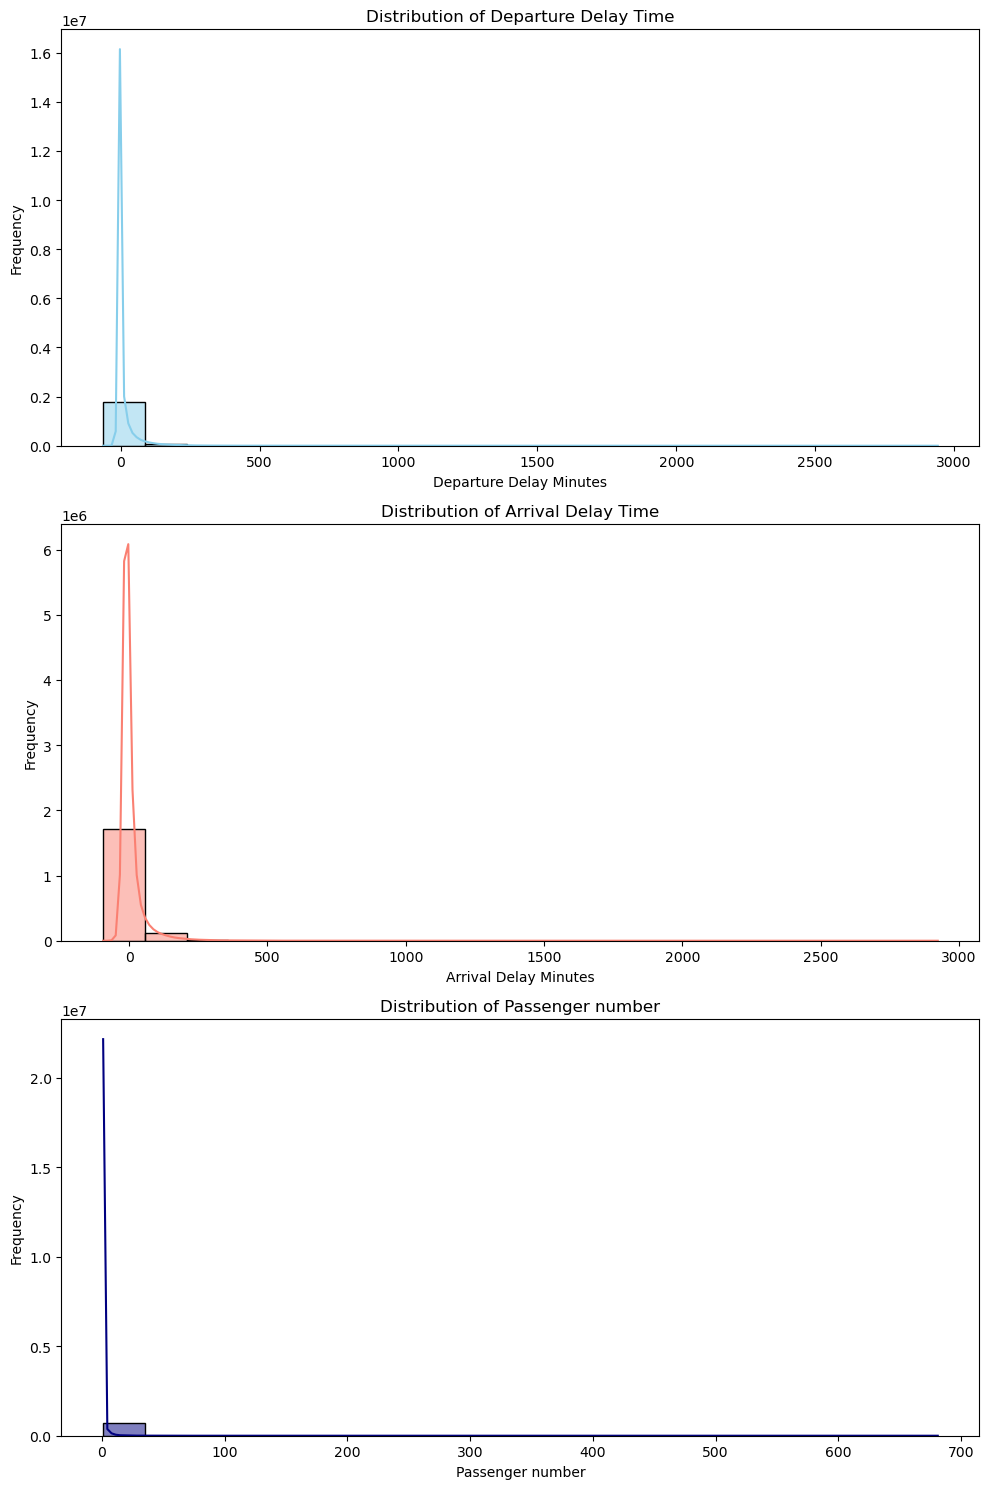

In [13]:
# Set up subplots
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# Plot Departure Delay Time distribution
sns.histplot(flights['DEP_DELAY'], bins=20, kde=True, color='skyblue', ax=axes[0])
axes[0].set_title('Distribution of Departure Delay Time')
axes[0].set_xlabel('Departure Delay Minutes')
axes[0].set_ylabel('Frequency')

# Plot Arrival Delay Time distribution
sns.histplot(flights['ARR_DELAY'], bins=20, kde=True, color='salmon', ax=axes[1])
axes[1].set_title('Distribution of Arrival Delay Time')
axes[1].set_xlabel('Arrival Delay Minutes')
axes[1].set_ylabel('Frequency')


# Plot Passengers Number distribution
sns.histplot(tickets['PASSENGERS'], bins=20, kde=True, color='navy', ax=axes[2])
axes[2].set_title('Distribution of Passenger number')
axes[2].set_xlabel('Passenger number')
axes[2].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

## Data analytics on business questions

### Q1. The 10 busiest round trip routes in terms of the number of round trip flights in the quarter (excluding canceled flights):

,RoundTripRoute,RoundTripCount
0,LAX-SFO,8340
1,LGA-ORD,7156
2,LAS-LAX,6511
3,JFK-LAX,6320
4,LAX-SEA,4999
5,BOS-LGA,4820
6,HNL-OGG,4794
7,PDX-SEA,4774
8,ATL-MCO,4707
9,ATL-LGA,4594


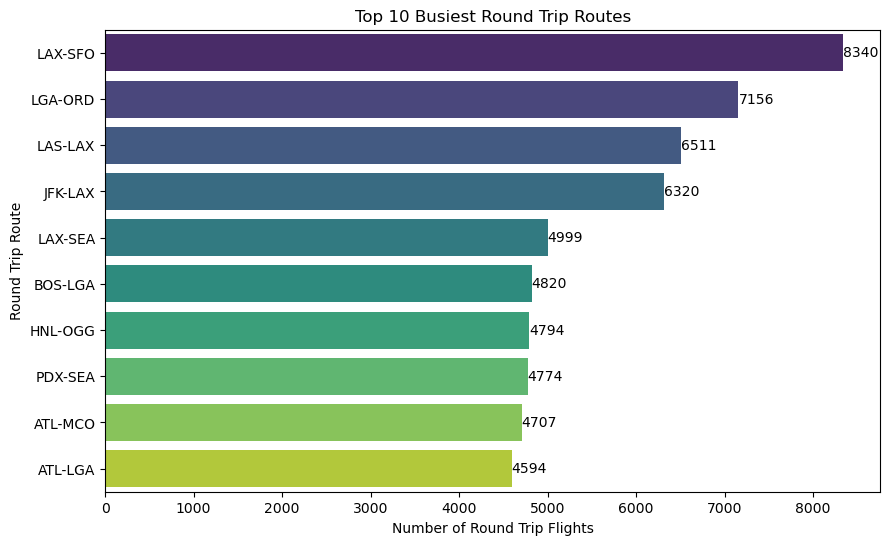

In [14]:
# Combine Origin and Dest to represent both directions of the round trip as a single entity
flights['RoundTripRoute'] = flights[['ORIGIN', 'DESTINATION']].apply(lambda x: '-'.join(sorted(x)), axis=1)

# Get the top 10 busiest round trip routes
top_10_busiest_routes = flights['RoundTripRoute'].value_counts().reset_index(name='RoundTripCount').head(10)
display(top_10_busiest_routes)

# Create a bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='RoundTripCount', y='RoundTripRoute', data=top_10_busiest_routes, palette='viridis')
plt.xlabel('Number of Round Trip Flights')
plt.ylabel('Round Trip Route')
plt.title('Top 10 Busiest Round Trip Routes')

# Add data labels at the end of each bar
for index, value in enumerate(top_10_busiest_routes['RoundTripCount']):
    plt.text(value + 0.1, index, str(value), va='center', fontsize=10)
    
# show bar chart  
plt.show()

### Q2 The 10 most profitable round trip routes, along with profit, total revenue, total cost, summary values of other key components and total round trip flights

#### 1. Find total cost
Costs breakdown:
* Fuel, Oil, Maintenance, Crew: \$8 per mile total

* Depreciation, Insurance, Other: \$1.18 per mile total

* Airport operational costs for the right to use the airports and related services are fixed at \\$5,000 for medium airports, and \\$10,000 for large airports. There is one charge for each airport where a flight lands. Thus, a round trip flight has a total of two airport charges.

* For each individual departure, the first 15 minutes of delays are free, otherwise each minute costs the airline \$75 in added operational costs.

* For each individual arrival, the first 15 minutes of delays are free, otherwise each minute costs the airline \$75 in added operational costs.

In [15]:
# Define a function to calculate total cost
def calculate_costs(df):
    
    # Define variables
    distance = df['DISTANCE']
    delays_dep = df['DEP_DELAY']
    delays_arr = df['ARR_DELAY']
    airport_type_ori = df['ORIGIN_TYPE']
    airport_type_des = df['ORIGIN_TYPE']
    
    # Cost parameters
    fuel_oil_maintenance_crew_cost_per_mile = 8
    depreciation_insurance_other_cost_per_mile = 1.18
    medium_airport_charge = 5000
    large_airport_charge = 10000
    delay_charge = 75
    delay_threshold = 15
    
    # Costs related to miles
    fuel_oil_maintenance_crew_cost = fuel_oil_maintenance_crew_cost_per_mile * distance
    depreciation_insurance_other_cost =   depreciation_insurance_other_cost_per_mile * distance

    # Airport operational costs 
    airport_charge = (medium_airport_charge if airport_type_ori == 'medium_airport' else large_airport_charge)\
                    +(medium_airport_charge if airport_type_des == 'medium_airport' else large_airport_charge)

    # Operational costs for delays
    delay_costs_departure = max(0, delays_dep -  delay_threshold) *  delay_charge
    delay_costs_arrival = max(0, delays_arr -  delay_threshold) *  delay_charge

    # Total costs
    total_costs = (fuel_oil_maintenance_crew_cost +
                   depreciation_insurance_other_cost +
                   airport_charge +
                   delay_costs_departure +
                   delay_costs_arrival)

    return total_costs

# Apply the formula to create a new column 'cost'
flights['cost'] = flights.apply(calculate_costs, axis=1)

#### 2. Find total revenue

* Each plane can accommodate up to 200 passengers and each flight has an associated occupancy rate provided in the Flights data set. Do not use the Tickets data set to determine occupancy.

* Baggage fee is \\$35 for each checked bag per flight. We expect 50\% of passengers to check an average of 1 bag per flight. The fee is charged separately for each leg of a round trip flight, thus 50\% of passengers will be charged a total of \$70 in baggage fees for a round trip flight.

* Disregard seasonal effects on ticket prices (i.e. ticket prices are the same in April as they are on Memorial Day or in December)

And actually there is another source of revenue - the Itinerary Fare. It is on the tickets table and calculated as per person per round trip route. Assume that the itineray fare is same for both directions in a round trip. It is considered as a simplified and achievable assumption because that there are round trips only and each airplane is dedicated to one round trip route between the 2 airports. That is why calculating the ticket fare revenue by route per passenger is considered as a reasonable method.

Knowing that, I collected itinerary fare per person and merged to flights table, then times actual passenger number as the source of revenue from fare. While merging, there could be some data loss when rows on tickets dataset could not map with those on flights dataset, as tickets data is a sampled dataset. So a inner join is performed and I further calculated the percentage of data loss. It turns out to be a 0.45% of loss, it is acceptable.

In [16]:
# Add a column indicating round trip name, to merge with flights table
tickets['RoundTripRoute'] = tickets[['ORIGIN', 'DESTINATION']].apply(lambda x: '-'.join(sorted(x)), axis=1)

# Calculate average fare per person and aggregrate it by round trip route
ticket_fare_revenue = tickets.groupby(['RoundTripRoute'])['ITIN_FARE'].mean().reset_index()

# Display the table
display(ticket_fare_revenue)

# Merge to flights table
flights_profit = pd.merge(flights, ticket_fare_revenue, on='RoundTripRoute',suffixes=('_flight','_ticket'))
display(flights_profit.head())

# Check the portion of data loss in the merge
1-len(flights_profit)/len(flights)

,RoundTripRoute,ITIN_FARE
0,ABE-ABI,758.000000
1,ABE-ABQ,534.000000
2,ABE-AGS,391.000000
3,ABE-AMA,654.000000
4,ABE-ASE,742.000000
...,...,...
25912,VLD-XNA,778.666667
25913,VPS-XNA,270.900000
25914,VPS-YUM,796.000000
25915,WRG-YAK,745.000000


,FL_DATE,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,DEST_AIRPORT_ID,DESTINATION,DEST_CITY_NAME,DEP_DELAY,ARR_DELAY,CANCELLED,AIR_TIME,DISTANCE,OCCUPANCY_RATE,IATA_CODE_x,ORIGIN_TYPE,IATA_CODE_y,DESTINATION_TYPE,RoundTripRoute,cost,ITIN_FARE
0,2019-03-02,WN,N955WN,4591,14635,RSW,"Fort Myers, FL",11042,CLE,"Cleveland, OH",-8.0,-6.0,0.0,143.0,1025.0,0.97,RSW,large_airport,CLE,large_airport,CLE-RSW,29409.5,307.28422
1,2019-03-09,WN,N754SW,3016,14635,RSW,"Fort Myers, FL",11042,CLE,"Cleveland, OH",-7.0,-22.0,0.0,137.0,1025.0,0.63,RSW,large_airport,CLE,large_airport,CLE-RSW,29409.5,307.28422
2,2019-03-24,UA,N14249,2350,14635,RSW,"Fort Myers, FL",11042,CLE,"Cleveland, OH",-16.0,-9.0,0.0,129.0,1025.0,0.98,RSW,large_airport,CLE,large_airport,CLE-RSW,29409.5,307.28422
3,2019-03-11,UA,N14240,2350,14635,RSW,"Fort Myers, FL",11042,CLE,"Cleveland, OH",-1.0,8.0,0.0,138.0,1025.0,0.36,RSW,large_airport,CLE,large_airport,CLE-RSW,29409.5,307.28422
4,2019-03-10,UA,N11206,2350,14635,RSW,"Fort Myers, FL",11042,CLE,"Cleveland, OH",-6.0,1.0,0.0,141.0,1025.0,0.45,RSW,large_airport,CLE,large_airport,CLE-RSW,29409.5,307.28422


0.004521736121773312

With the merged data, a function was conducted to calculate total revenue.

In [17]:
# Functions to calculate revenue
def calculate_revenue(df):
    
    # Define some variables
    occupancy_rate = df['OCCUPANCY_RATE']
    fare_per_person = df['ITIN_FARE']
    
    # Revenue parameters
    capacity = 200
    baggage_fee_per_person = 35
    
    # Actual passengers
    passengers = occupancy_rate * capacity
    
    # Baggage fee revenue
    revenue_baggage_fee = 0.5 * passengers * baggage_fee_per_person
    
    # Itinerary fare revenue
    revenue_ticket_fare = passengers * fare_per_person * 0.5
    
    # Total revenue
    total_revenue = revenue_ticket_fare + revenue_baggage_fee
    
    return total_revenue

# Apply the formula to create a new column 'revenue'
flights_profit['revenue'] = flights_profit.apply(calculate_revenue, axis=1)

#### 3. Profit using "revenue - cost"

In [18]:
flights_profit['profit']  = flights_profit['revenue'] - flights_profit['cost']

#### 4. Results
Now, calculate the total profit and find top 10 by round trip route

,RoundTripRoute,Profit,Avg_Profit,Revenue,Cost,Avg_Dep_Delay,Avg_Arr_Delay,Avg_Occupancy,Avg_Distance,Avg_Delay
2018,JFK-LAX,1.286107e+08,20349.796697,4.067601e+08,2.781494e+08,8.546044,-1.865249,0.650074,2475.0,6.680795
2835,SLC-TWF,7.066244e+07,121413.132927,8.080148e+07,1.013903e+07,6.596220,1.134532,0.668041,175.0,7.730752
1581,EWR-SFO,6.291816e+07,25956.334631,1.753845e+08,1.124664e+08,21.497112,14.487803,0.649905,2565.0,35.984915
841,CLT-FLO,5.800896e+07,115097.148254,6.648536e+07,8.476395e+06,4.424603,1.315476,0.648552,99.0,5.740079
2045,JFK-SFO,4.330570e+07,11638.189711,2.141608e+08,1.708551e+08,15.353937,6.876814,0.649852,2586.0,22.230751
847,CLT-GSP,4.215033e+07,27246.497845,7.570247e+07,3.355213e+07,7.051713,-0.063995,0.649580,75.0,6.987718
855,CLT-ILM,3.971804e+07,27111.288396,6.524715e+07,2.552911e+07,4.509898,-0.414334,0.655925,185.0,4.095563
2705,PIH-SLC,3.873135e+07,71724.714530,4.804173e+07,9.310380e+06,1.766667,-3.958058,0.649333,150.0,-2.191391
846,CLT-GSO,3.758611e+07,25276.468877,6.979929e+07,3.221318e+07,5.480161,-1.205111,0.651036,83.0,4.275050
2330,MDT-PHL,3.532057e+07,44484.345995,4.864904e+07,1.332847e+07,3.607053,3.949622,0.649055,84.0,7.556675


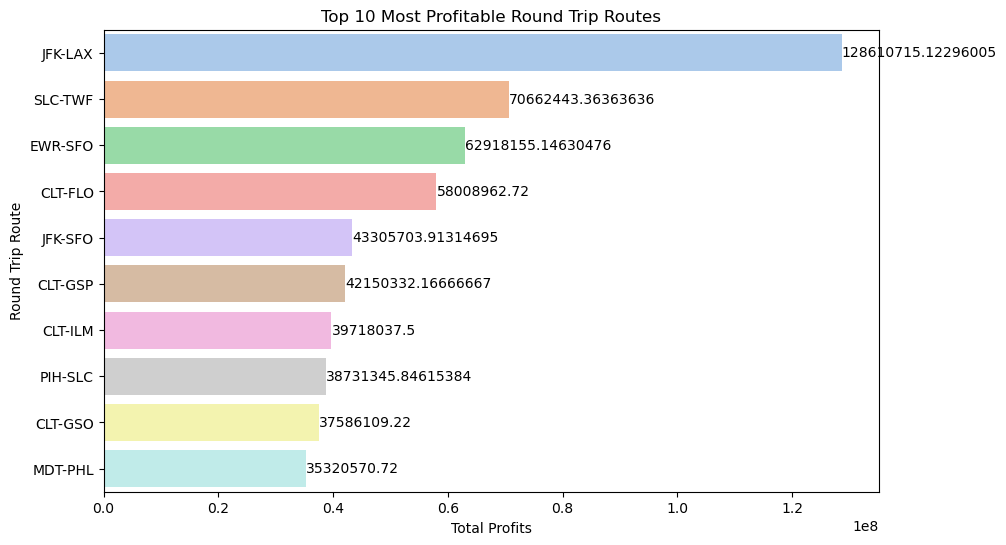

In [19]:
# Summary profit and other components by route
route_summary = flights_profit.groupby('RoundTripRoute').agg(
    Profit=('profit', 'sum'),
    Avg_Profit=('profit', 'mean'),
    Revenue=('revenue', 'sum'),
    Cost=('cost', 'sum'),
    Avg_Dep_Delay=('DEP_DELAY', 'mean'),
    Avg_Arr_Delay=('ARR_DELAY', 'mean'),
    Avg_Occupancy=('OCCUPANCY_RATE', 'mean'),
    Avg_Distance=('DISTANCE','mean')
).reset_index()

route_summary['Avg_Delay'] = route_summary['Avg_Dep_Delay'] + route_summary['Avg_Arr_Delay']

# Wort route types by total profit in descending order
top_10_profit = route_summary.sort_values(by='Profit', ascending=False).head(10)
display(top_10_profit)

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Profit', y='RoundTripRoute', data=top_10_profit, palette='pastel')
plt.xlabel('Total Profits')
plt.ylabel('Round Trip Route')
plt.title('Top 10 Most Profitable Round Trip Routes')

# Add data labels at the end of each bar
for index, value in enumerate(top_10_profit['Profit']):
    plt.text(value + 0.1, index, str(value), va='center', fontsize=10)
    
# Show bar chart  
plt.show()

### Q3: The 5 round trip routes that you recommend to invest in based on any factors that you choose.

In shaping my investment strategy, I've focused on key factors that align with the company values and financial goals. My primary metric is Total Profit, carrying 60% weight after Min-Max scaling. This reflects various considerations, making it a cornerstone in my decision-making.

Recognizing the importance of growth potential, I've assigned a 20% weight to the occupancy rate. A higher rate not only indicates current success but also signals future growth.

Distance plays a role too. Shorter routes mean lower costs and align with my commitment to sustainability. Given this, I've allocated 20% weight to Min-Max scaled route distance.

Punctuality, a core part of my brand ("On time, for you"), is vital for customer satisfaction. To ensure this, I've excluded routes with an average delay exceeding 15 minutes.

By simplifying my approach, I aim to make informed investment decisions that reflect optimize financial outcomes and recommend top 5 routes to invest. 

,RoundTripRoute,Profit,Avg_Profit,Revenue,Cost,Avg_Dep_Delay,Avg_Arr_Delay,Avg_Occupancy,Avg_Distance,Avg_Delay,Profit_scaled,Avg_Occupancy_scaled,Avg_Distance_scaled,Score
2018,JFK-LAX,1.286107e+08,20349.796697,4.067601e+08,2.781494e+08,8.546044,-1.865249,0.650074,2475.0,6.680795,1.000000,0.357298,0.247694,0.821921
2835,SLC-TWF,7.066244e+07,121413.132927,8.080148e+07,1.013903e+07,6.596220,1.134532,0.668041,175.0,7.730752,0.615054,0.397401,0.014594,0.645594
841,CLT-FLO,5.800896e+07,115097.148254,6.648536e+07,8.476395e+06,4.424603,1.315476,0.648552,99.0,5.740079,0.530998,0.353899,0.006892,0.588000
847,CLT-GSP,4.215033e+07,27246.497845,7.570247e+07,3.355213e+07,7.051713,-0.063995,0.649580,75.0,6.987718,0.425650,0.356194,0.004459,0.525737
855,CLT-ILM,3.971804e+07,27111.288396,6.524715e+07,2.552911e+07,4.509898,-0.414334,0.655925,185.0,4.095563,0.409493,0.370356,0.015608,0.516645


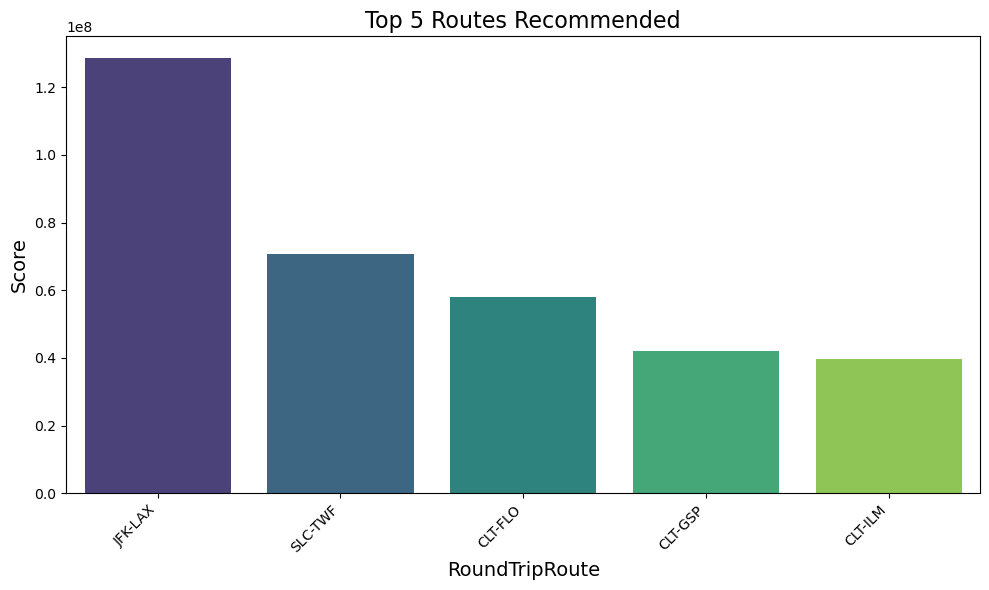

In [20]:
# Exclude routes with average delay over 15 minutes
route_summary = route_summary[route_summary['Avg_Delay'] < 15]

# Extract the columns to be rescaled
columns_to_rescale = ['Profit', 'Avg_Occupancy', 'Avg_Distance']
columns_to_rescale_newname = ['Profit_scaled', 'Avg_Occupancy_scaled', 'Avg_Distance_scaled']

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Define weights
w1 = 0.6
w2 = 0.2
w3 = 0.2

# Fit and transform the selected columns
route_summary[columns_to_rescale_newname] = scaler.fit_transform(route_summary[columns_to_rescale])

# Calculate the field "Score" of "0.6*profit + 0.2*occupancy + 0.2*(1-disnatce)"
route_summary['Score'] = w1*route_summary['Profit_scaled'] + w2*route_summary['Avg_Occupancy_scaled'] \
                       + w3*(1-route_summary['Avg_Distance_scaled'])

# Sort the DataFrame based on profit and flight counts in descending order
top_5_routes = route_summary.sort_values(by='Score', ascending=False).head(5)
display(top_5_routes)

# Create a bar chart
plt.figure(figsize=(10, 6))
bar_chart = sns.barplot(x='RoundTripRoute', y='Profit', data=top_5_routes, palette='viridis')

# Add labels and title
plt.xlabel('RoundTripRoute', fontsize=14)
plt.ylabel('Score', fontsize=14)
plt.title('Top 5 Routes Recommended', fontsize=16)

# Rotate x-axis labels for better readability
bar_chart.set_xticklabels(bar_chart.get_xticklabels(), rotation=45, horizontalalignment='right')

# Show the plot
plt.tight_layout()
plt.show()

# Set the recommended routes for further study
recommended_routes = top_5_routes['RoundTripRoute']

So the top 5 recommended routes are:

JFK(John F. Kennedy International Airport in NY) - LAX(Los Angeles International Airport in CA)

SLC(Salt Lake City International Airport in UT) - TWF(Magic Valley Regional Airport in ID)

CLT(Charlotte Douglas International Airport in NC) - FLO(Florence Regional Airport in SC)

CLT(Charlotte Douglas International Airport in NC) - GSP(Greenville-Spartanburg International Airport in SC)

CLT(Charlotte Douglas International Airport in NC) - ILM(Wilmington International Airport in NC)

### Q4 The number of round trip flights it will take to breakeven on the upfront airplane cost for each of the 5 round trip routes that you recommend.

In [21]:
# The upfront cost of each route is 90 millions
upfront_cost = 90000000

# Calculate route trips required to breakeven the upfront cost
top_5_routes['Breakeven_Round_Flights'] = np.ceil(upfront_cost / top_5_routes['Avg_Profit']).astype(int)
display(top_5_routes)

# Generate results in readable text
for index, row in top_5_routes.iterrows():
    route = row['RoundTripRoute']
    count = row['Breakeven_Round_Flights']
    print(f"{route} needs at least {count} round trip flights to break even.")

,RoundTripRoute,Profit,Avg_Profit,Revenue,Cost,Avg_Dep_Delay,Avg_Arr_Delay,Avg_Occupancy,Avg_Distance,Avg_Delay,Profit_scaled,Avg_Occupancy_scaled,Avg_Distance_scaled,Score,Breakeven_Round_Flights
2018,JFK-LAX,1.286107e+08,20349.796697,4.067601e+08,2.781494e+08,8.546044,-1.865249,0.650074,2475.0,6.680795,1.000000,0.357298,0.247694,0.821921,4423
2835,SLC-TWF,7.066244e+07,121413.132927,8.080148e+07,1.013903e+07,6.596220,1.134532,0.668041,175.0,7.730752,0.615054,0.397401,0.014594,0.645594,742
841,CLT-FLO,5.800896e+07,115097.148254,6.648536e+07,8.476395e+06,4.424603,1.315476,0.648552,99.0,5.740079,0.530998,0.353899,0.006892,0.588000,782
847,CLT-GSP,4.215033e+07,27246.497845,7.570247e+07,3.355213e+07,7.051713,-0.063995,0.649580,75.0,6.987718,0.425650,0.356194,0.004459,0.525737,3304
855,CLT-ILM,3.971804e+07,27111.288396,6.524715e+07,2.552911e+07,4.509898,-0.414334,0.655925,185.0,4.095563,0.409493,0.370356,0.015608,0.516645,3320


JFK-LAX needs at least 4423 round trip flights to break even.
SLC-TWF needs at least 742 round trip flights to break even.
CLT-FLO needs at least 782 round trip flights to break even.
CLT-GSP needs at least 3304 round trip flights to break even.
CLT-ILM needs at least 3320 round trip flights to break even.


### Q5 Key Performance Indicators (KPI’s) that you recommend tracking in the future to measure the success of the round trip routes that you recommend.
The aim is to find an effcient way to track the performance of each route when new data included. There are some useful KPI's in my mind as below:

#### 1. On-Time Performance (OTP): 
Measure the percentage of flights that depart and arrive on time. Delays can impact customer satisfaction and operational efficiency. If there is either a delay in departure or a delay in arrival, it should be flagged.

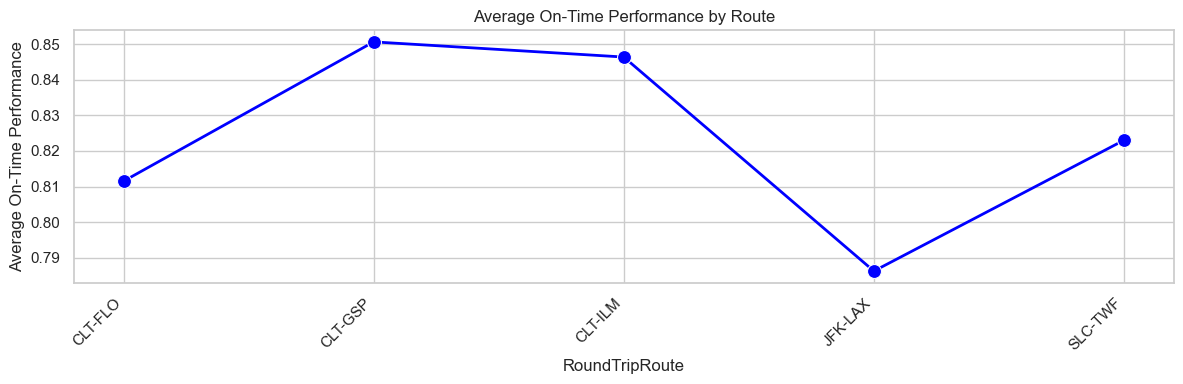

In [22]:
# Define the fuction to calculate OTP using flights data
def calculate_otp(flights,recommended_routes):
    
    # Combine 'ORIGIN' and 'DEST' to create a route column
    flights['RoundTripRoute'] = flights[['ORIGIN', 'DESTINATION']].apply(lambda x: '-'.join(sorted(x)), axis=1)

    # Get indicator showing whether it is on time (delayed less than 15 minutes)
    flights['On_Time'] = (flights['DEP_DELAY']<=15) & (flights['ARR_DELAY']<=15)
    
    # Calculate OTP for each route
    otp_by_route = flights.groupby('RoundTripRoute')['On_Time'].mean().reset_index(name='OTP')
    
    # Filter out the routes on recommended route list
    otp_results = otp_by_route[otp_by_route['RoundTripRoute'].isin(recommended_routes)]
    
    # Return values
    return otp_results

# Get results
otp_results = calculate_otp(flights,recommended_routes)

# Set the plot style
sns.set(style="whitegrid")

# Set the plot
plt.figure(figsize=(12, 4))
sns.lineplot(x='RoundTripRoute', y='OTP', data=otp_results, marker='o', markersize=10, color='blue', linewidth=2)

# Set plot labels and title
plt.xlabel('RoundTripRoute')
plt.ylabel('Average On-Time Performance')
plt.title('Average On-Time Performance by Route')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

#### 2. Occupancy Rate(OR): 
Track the percentage of occupied seats on each flight. A high load factor indicates efficient use of capacity.

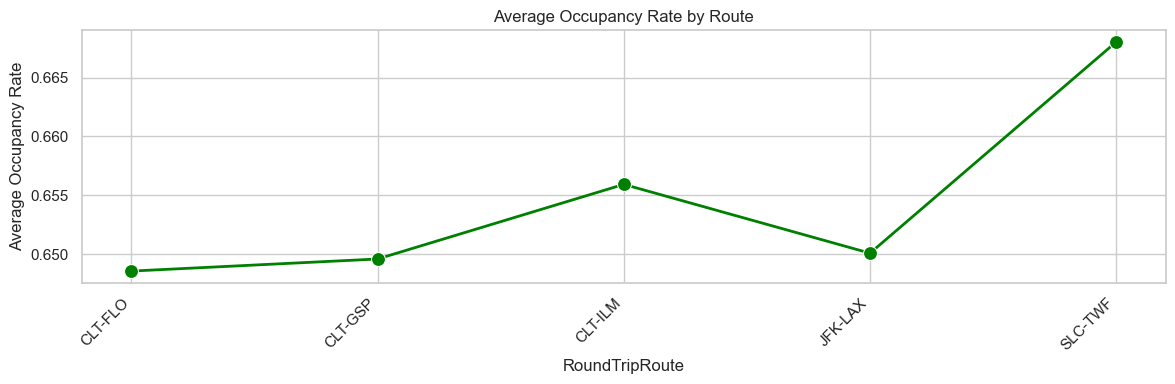

In [23]:
# Define the calculation of occupancy rate(OR)
def calculate_occupancy_rate(flights,recommended_routes):
    # Combine 'ORIGIN' and 'DEST' to create a route column
    flights['RoundTripRoute'] = flights[['ORIGIN', 'DESTINATION']].apply(lambda x: '-'.join(sorted(x)), axis=1)

    # Calculate occupancy rate for each route
    occupancy_by_route = flights.groupby('RoundTripRoute')['OCCUPANCY_RATE'].mean().reset_index(name='Occupancy_Rate')

    # Filter out the routes on recommended route list
    occupancy_results = occupancy_by_route[occupancy_by_route['RoundTripRoute'].isin(recommended_routes)]
    return occupancy_results

# Get occupancy rate results
occupancy_results = calculate_occupancy_rate(flights,recommended_routes)

# Set the plot style
sns.set(style="whitegrid")

# Set the plot
plt.figure(figsize=(12, 4))
sns.lineplot(x='RoundTripRoute', y='Occupancy_Rate', data=occupancy_results, marker='o', markersize=10, color='green', linewidth=2)

# Set plot labels and title
plt.xlabel('RoundTripRoute')
plt.ylabel('Average Occupancy Rate')
plt.title('Average Occupancy Rate by Route')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

#### 3. Return on Investment(ROI): 
ROI stands for Return on Investment. It is a financial metric used to evaluate the profitability of an investment. ROI is expressed as a percentage and represents the ratio of the net gain from an investment relative to its initial cost. Here I use a simplified way, as the profit divided by the initial investment.

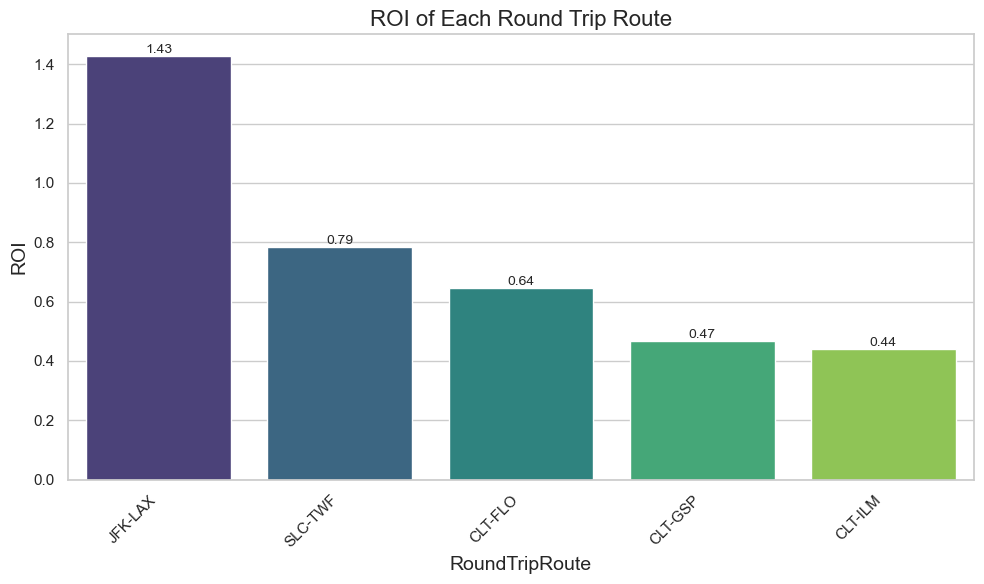

In [24]:
# Define the initial_investment
initial_investment = 90000000

# Calculate the ROI
top_5_routes['ROI'] = top_5_routes['Profit']/initial_investment

# Create a bar chart
plt.figure(figsize=(10, 6))
bar_chart = sns.barplot(x='RoundTripRoute', y='ROI', data=top_5_routes, palette='viridis')

# Add data labels
for index, value in enumerate(top_5_routes['ROI']):
    bar_chart.text(index, value, f'{value:.2f}', ha='center', va='bottom', fontsize=10)

# Add labels and title
plt.xlabel('RoundTripRoute', fontsize=14)
plt.ylabel('ROI', fontsize=14)
plt.title('ROI of Each Round Trip Route', fontsize=16)

# Rotate x-axis labels for better readability
bar_chart.set_xticklabels(bar_chart.get_xticklabels(), rotation=45, horizontalalignment='right')

# Show the plot
plt.tight_layout()
plt.show()

#### 4. Profit Margin: 
A higher profit margin indicates that a company is generating more profit per unit of revenue, which is generally considered favorable. It is calculated by total profit divided by total revenue.

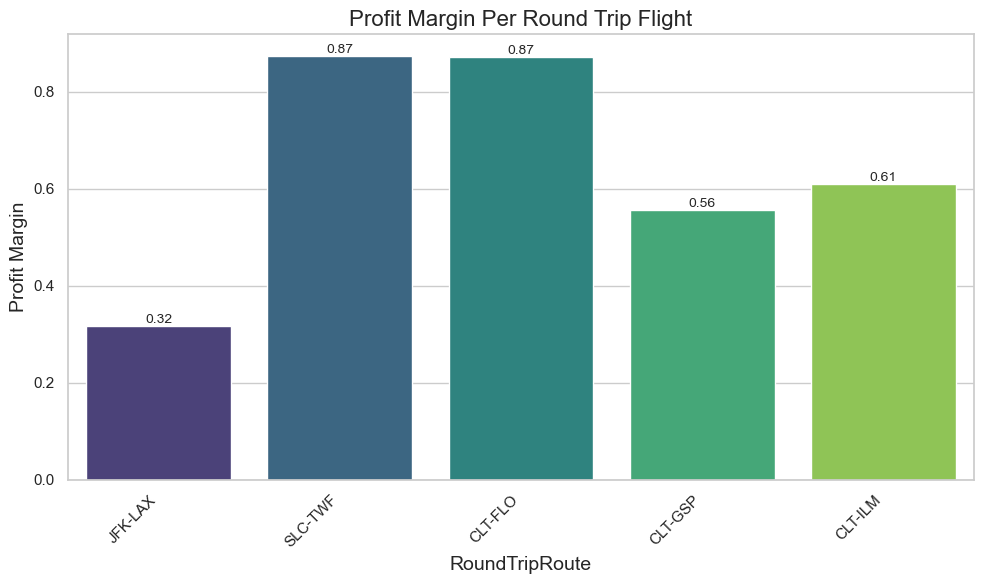

In [25]:
# Calculate Profit Margin
top_5_routes['Profit_Margin'] = top_5_routes['Profit'] / top_5_routes['Revenue']

# Create a bar chart
plt.figure(figsize=(10, 6))
bar_chart = sns.barplot(x='RoundTripRoute', y='Profit_Margin', data=top_5_routes, palette='viridis')

# Add data labels
for index, value in enumerate(top_5_routes['Profit_Margin']):
    bar_chart.text(index, value, f'{value:.2f}', ha='center', va='bottom', fontsize=10)

# Add labels and title
plt.xlabel('RoundTripRoute', fontsize=14)
plt.ylabel('Profit Margin', fontsize=14)
plt.title('Profit Margin Per Round Trip Flight', fontsize=16)

# Rotate x-axis labels for better readability
bar_chart.set_xticklabels(bar_chart.get_xticklabels(), rotation=45, horizontalalignment='right')

# Show the plot
plt.tight_layout()
plt.show()

#### 5. Breakeven Round Flights 
The number of round trip flights it will take to breakeven on the upfront airplane cost for each of the 5 round trip routes that you recommend. It is already calculated it, let me display the result below:

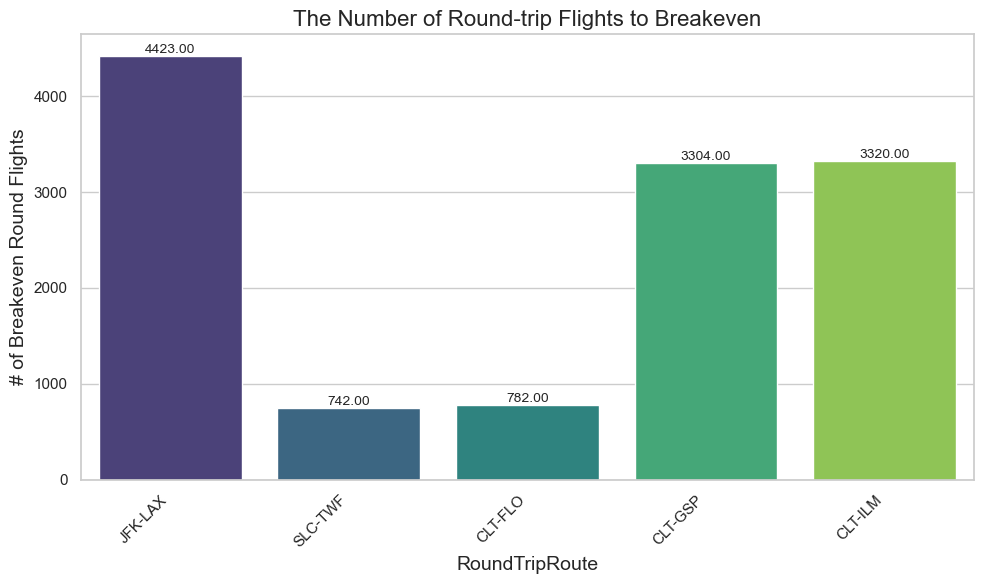

In [26]:
# Create a bar chart
plt.figure(figsize=(10, 6))
bar_chart = sns.barplot(x='RoundTripRoute', y='Breakeven_Round_Flights', data=top_5_routes, palette='viridis')

# Add data labels
for index, value in enumerate(top_5_routes['Breakeven_Round_Flights']):
    bar_chart.text(index, value, f'{value:.2f}', ha='center', va='bottom', fontsize=10)

# Add labels and title
plt.xlabel('RoundTripRoute', fontsize=14)
plt.ylabel('# of Breakeven Round Flights', fontsize=14)
plt.title('The Number of Round-trip Flights to Breakeven', fontsize=16)

# Rotate x-axis labels for better readability
bar_chart.set_xticklabels(bar_chart.get_xticklabels(), rotation=45, horizontalalignment='right')

# Show the plot
plt.tight_layout()
plt.show()